In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Load Data

In [211]:
data = pd.read_csv('AirQuality.csv', index_col=False)
Z = data["Daily AQI Value PM2.5"] 

# Randomly chosen subsection of the data
Z = Z[1000:1200]
train_size = int(len(Z) * 0.8)
train, test = Z[:train_size], Z[train_size:]

Model Forecasting

In [212]:
def forecast(model, params, series_name):

    # Get in-sample predictions (fitted values)
    fitted_model = model.fit()
    fitted_values = fitted_model.fittedvalues

    # Forecast the test period
    forecast = fitted_model.forecast(steps=len(test))

    # Plot data, fitted values, forecasted values
    plt.figure(figsize=(12,6))
    plt.plot(Z, label="Original Data")
    plt.plot(test.index, forecast, label="Forecast", color="g")
    plt.axvline(x=test.index[0], color="gray", label="Train-Test Split", linestyle="dashed")
    plt.plot(fitted_values, label="Fitted Values", color='orange')
    # Display
    plt.title(f"ARIMA Model({params}): {series_name}")
    plt.xlabel("LABEL HERE")
    plt.ylabel("LABEL HERE")
    plt.legend()
    plt.show()
        

c:\Users\sophi\anaconda3\New_folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


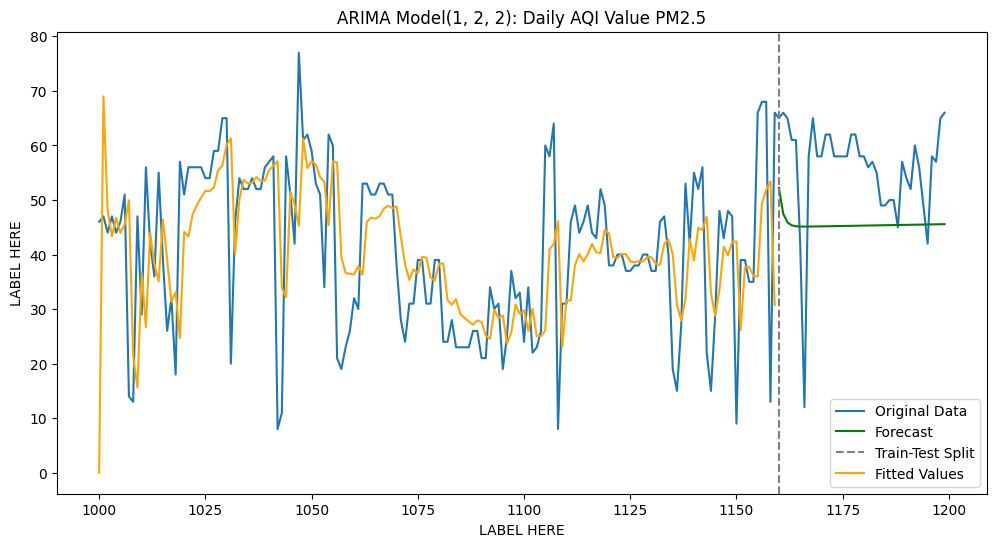

In [213]:
# ARIMA Model
p, d, q = 1, 2, 2
params = ", ".join(map(str,(p,d,q)))
model = ARIMA(train, order=(p, d, q))
forecast(model, params, "Daily AQI Value PM2.5")

c:\Users\sophi\anaconda3\New_folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


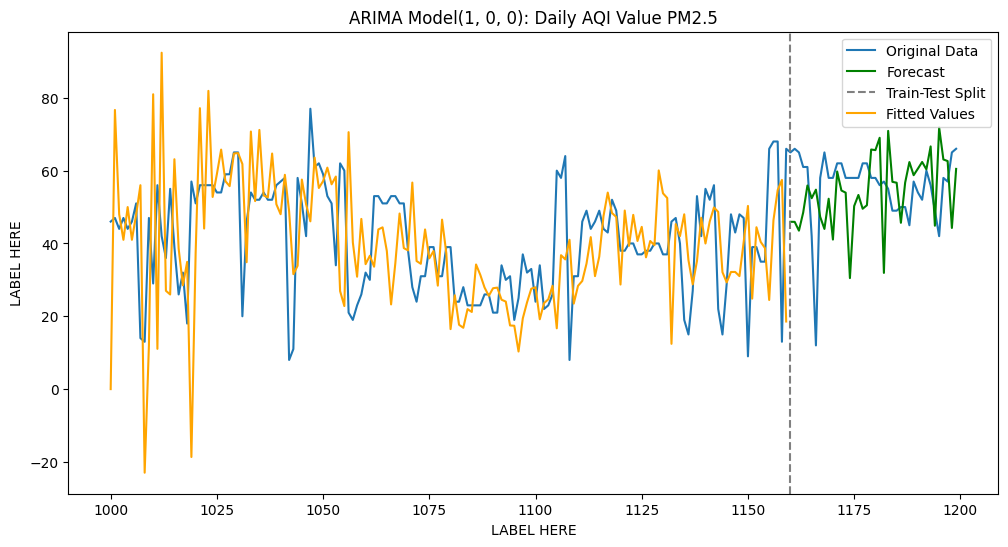

In [214]:
# SARIMA model
p, d, q = 1, 0, 0
params = ", ".join(map(str,(p,d,q)))
model = SARIMAX(train, order=(1, 2, 2), seasonal_order=(1, 1, 0, 12))
forecast(model, params, "Daily AQI Value PM2.5")

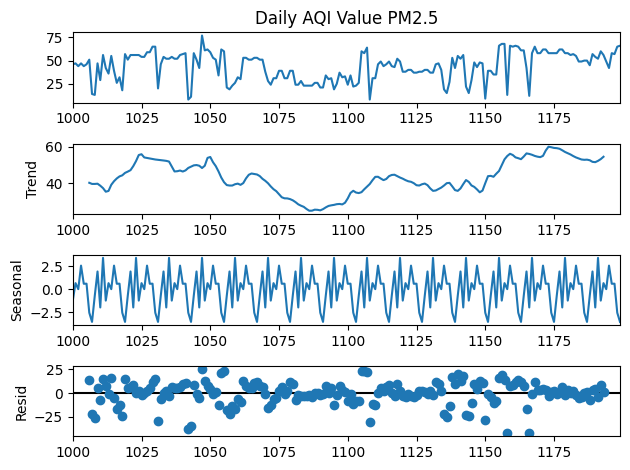

In [215]:
# Decompose the time series
decomposition = seasonal_decompose(Z, period=12)
decomposition.plot()
plt.show()

In [216]:
# Automatically select p, d, q
auto_model = auto_arima(train, seasonal=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  160
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -640.601
Date:                Sun, 23 Mar 2025   AIC                           1287.203
Time:                        18:56:37   BIC                           1296.428
Sample:                             0   HQIC                          1290.949
                                - 160                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.7397      3.379      6.729      0.000      16.117      29.363
ar.L1          0.4426      0.081      5.438      0.000       0.283       0.602
sigma2       175.5587     21.869      8.028      0.0